# EIT in three-level atom
Based on Jenkins Thesis which used QuTiP for EIT studies.

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

First define the $\hat{\sigma}_{ij}$ operators according to atomic levels shown in the following figure. Decay rates are also indicated.

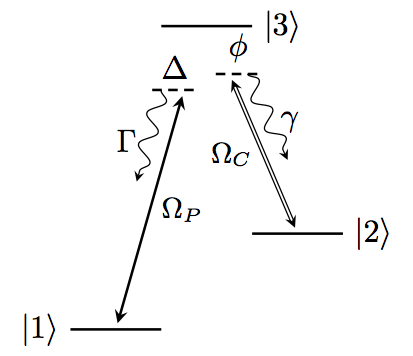

In [2]:
one, two, three = three_level_basis()
sig11 = one * one.dag()
sig22 = two * two.dag()
sig33 = three * three.dag()
sig13 = one * three.dag()
sig23 = two * three.dag()
sig12 = one * two.dag()

Image("fig/EIT_levels.png")

In [80]:
# Loop over the detuning Delta and generate optical response

# constants based on Jenkins EIT masters thesis
# It seems like the values they quote aren't right. They don't match the code.

# Decay rates
Gamma = 0.1  # decay rate on probe transition
gamma = 5.0  # decay rate on control transition 
gamma_c = 0.05  # coherence decay rate (2->1)
phi = 0  # control field detuning

# Rabi frequencies for pump and control beam
omegaP = 0.1*gamma  # pump
omegaC = 1.0*gamma  # control

# Collapse operators
c1 = np.sqrt(Gamma)*sig13  # 1-3 coherence decay (probe transition)
c2 = np.sqrt(gamma)*sig23  # 2-3 coherence decay (control transition)
c3 = np.sqrt(gamma_c)*sig12  # ground state coherence decay
collapse = [c1,c2,c3]

deltalist = np.linspace(-20,20,301)

rho_33 = []
rho_31 = []
rho_13 = []
chi = []

for Delta in deltalist:
    # Define Hamiltonian for detuning Delta:
    H = (omegaP*(sig13+sig13.dag()) + omegaC*(sig23+sig23.dag()) + phi*(sig33 - sig22) + Delta*(sig33 - sig11))
    
    # find steady-state density operator:
    rho_ss = steadystate(H,collapse)
    
    # save values for plotting later:
    rho_33.append(rho_ss[2,2])  # save the exited state population
    rho_31.append(rho_ss[2,0])  # save the ground-excited coherence
    rho_13.append(rho_ss[0,2])
    # this approach is ugly because it relies on the internal matrix layout, better to use projection ops:
    
    chi.append(expect(sig13.dag(),rho_ss)) # use sig31 ( which is sig13.dag() )
    # This is not equality, but the susceptability is proportional to sig31

Text(0,0.5,'$\\hat{\\rho}_{33}$')

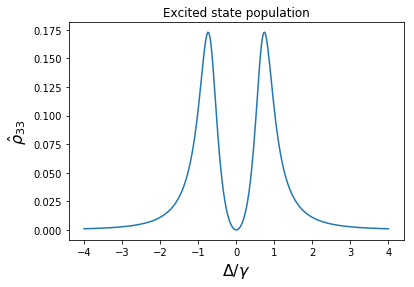

In [81]:
fsize = {'fontsize':'16'}
plt.plot(deltalist/gamma,np.real(rho_33))
plt.title("Excited state population")
plt.xlabel("$\Delta/\gamma$",**fsize)
plt.ylabel("$\hat{\\rho}_{33}$",**fsize)

Text(0.5,0,'$\\Delta/\\gamma$')

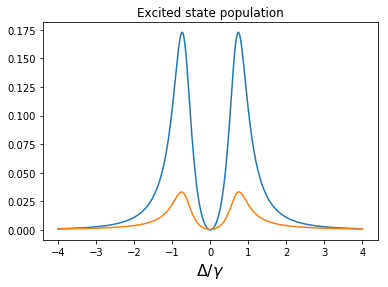

In [82]:
fsize = {'fontsize':'16'}
plt.plot(deltalist/gamma,np.real(rho_33))
plt.plot(deltalist/gamma,np.imag(rho_13))
plt.title("Excited state population")
plt.xlabel("$\Delta/\gamma$",**fsize)
#plt.ylabel("$\hat{\\rho}_{31}$",**fsize)

Text(0.5,0,'$\\Delta$')

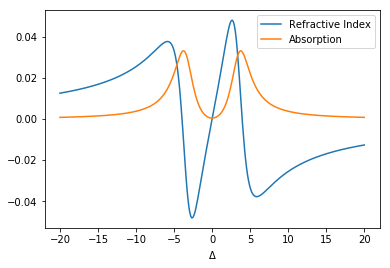

In [84]:
# This is probably the simplest official way to do it.
plt.plot(deltalist,np.real(chi),label="Refractive Index")
plt.plot(deltalist,np.imag(chi),label="Absorption")
plt.legend()
#plt.title("Nonlinear response")
plt.xlabel("$\Delta$")

The sign of n is wrong in graph in Jenkins paper, it should slope up like this in the EIT window. Not sure why it's right here. Been very careful to match notation and terms to Jenkins' thesis.